In [5]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split

from selenium import webdriver

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils

In [3]:
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

In [10]:
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.optimizers import SGD

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [14]:
np.random.seed(0)

model1 = Sequential()

model1.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer='glorot_uniform'))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))

model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [15]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 5,874
Trainable params: 5,874
Non-trainable params: 0
_________________________________________________________________


In [16]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=50, batch_size=100, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 16s - loss: 0.3924 - acc: 0.8879 - val_loss: 0.2095 - val_acc: 0.9428
Epoch 2/50
 - 16s - loss: 0.1832 - acc: 0.9476 - val_loss: 0.1447 - val_acc: 0.9573
Epoch 3/50
 - 16s - loss: 0.1359 - acc: 0.9607 - val_loss: 0.1116 - val_acc: 0.9672
Epoch 4/50
 - 15s - loss: 0.1134 - acc: 0.9672 - val_loss: 0.0950 - val_acc: 0.9711
Epoch 5/50
 - 16s - loss: 0.0996 - acc: 0.9709 - val_loss: 0.0866 - val_acc: 0.9741
Epoch 6/50
 - 15s - loss: 0.0907 - acc: 0.9736 - val_loss: 0.0803 - val_acc: 0.9760
Epoch 7/50
 - 16s - loss: 0.0837 - acc: 0.9757 - val_loss: 0.0738 - val_acc: 0.9772
Epoch 8/50
 - 15s - loss: 0.0781 - acc: 0.9773 - val_loss: 0.0740 - val_acc: 0.9769
Epoch 9/50
 - 16s - loss: 0.0747 - acc: 0.9785 - val_loss: 0.0689 - val_acc: 0.9777
Epoch 10/50
 - 15s - loss: 0.0711 - acc: 0.9790 - val_loss: 0.0720 - val_acc: 0.9780
Epoch 11/50
 - 16s - loss: 0.0683 - acc: 0.9799 - val_loss: 0.0685 - val_acc: 0.9776
Epoch 12/50
 - 15s - los

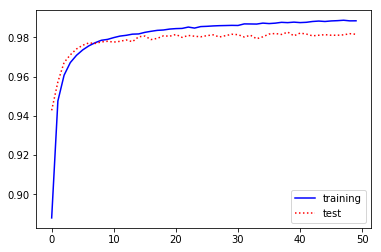

In [17]:
plt.plot(hist1.history['acc'], 'b-', label='training')
plt.plot(hist1.history['val_acc'], 'r:', label='test')
plt.legend()
plt.show()